In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data = {'x1': [0,2,0,0,-1,1],
        'x2': [3,0,1,1,0,1],
        'x3': [0,0,3,2,1,1],
        'y': ['Red','Red','Red','Green','Green','Red']}

print(Data)

{'x1': [0, 2, 0, 0, -1, 1], 'x2': [3, 0, 1, 1, 0, 1], 'x3': [0, 0, 3, 2, 1, 1], 'y': ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']}


In [ ]:
df = pd.DataFrame(Data)
print(df)

x = df[['x1','x2','x3']]
y = df['y']
print(" ")
print(x)
print(y)

   x1  x2  x3      y
0   0   3   0    Red
1   2   0   0    Red
2   0   1   3    Red
3   0   1   2  Green
4  -1   0   1  Green
5   1   1   1    Red
 
   x1  x2  x3
0   0   3   0
1   2   0   0
2   0   1   3
3   0   1   2
4  -1   0   1
5   1   1   1
0      Red
1      Red
2      Red
3    Green
4    Green
5      Red
Name: y, dtype: object


In [ ]:
test_point = np.array([[0,0,0]]) # Reshape to a 2D array as expected by predict
knn = KNeighborsClassifier(n_neighbors=5, metric ='euclidean')
knn.fit(x,y)
pred = knn.predict(test_point) # Pass the reshaped test_point
print(f"k={5}, prediction={pred}")

k=5, prediction=['Red']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
test_point = np.array([[0, 0, 0]])

for k in range(1, len(x) + 1):
    # Reinitialize KNN in each iteration
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x, y)
    pred = knn.predict(test_point)
    print(f"k={k}, prediction={pred[0]}")

k=1, prediction=Green
k=2, prediction=Green
k=3, prediction=Red
k=4, prediction=Green
k=5, prediction=Red
k=6, prediction=Red


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/pytho

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
k=1, Accuracy=0.9667
k=2, Accuracy=0.9667
k=3, Accuracy=0.9667
k=4, Accuracy=0.9667
k=5, Accuracy=0.9667
k=6, Accuracy=0.9667
k=7, Accuracy=0.9667
k=8, Accuracy=0.9667
k=9, Accuracy=0.9667
k=10, Accuracy=0.9667
k=11, Accuracy=0.9667
k=12, Accuracy=0.9667
k=13, Accuracy=0.9667
k=14, Accuracy=0.9667
k=15, Accuracy=0.9667
k=16, Accuracy=0.9667
k=17, Accuracy=0.9667
k=18, Accuracy=0.9667
k=19, Accuracy=0.9667
k=20, Accuracy=0.9667


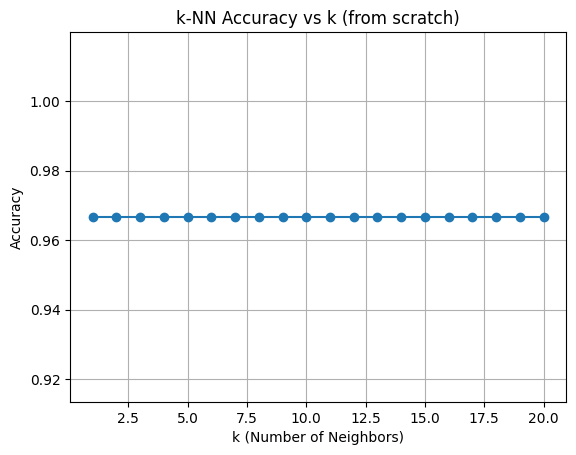

In [ ]:
# M3: Load the 'iris' dataset and perform k-nearest neighbor classification.
# plot the accuracy/error w.r.t different k values. Compare the accuracy with
# the built in function of K-NN.
# The program can be written python programming language from scratch.
# No machine learning/data science/ statistics package/ library should be used.

import csv
import random
import math
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to your dataset file
dataset_path = '/content/Iris.csv'  # Do NOT change

# Step 1: Load the Iris Dataset
def load_iris_dataset(filename):
    dataset = []
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip the header row
        for row in csv_reader:
            if not row:
                continue
            features = list(map(float, row[1:-1]))  # Skip the first column (Id)
            label = row[-1]
            dataset.append((features, label))
    return dataset

# Step 2: Split Dataset into Train and Test Sets
def train_test_split(dataset, test_size=0.2):
    random.seed(42)  # For reproducibility
    random.shuffle(dataset)
    split_index = int(len(dataset) * (1 - test_size))
    return dataset[:split_index], dataset[split_index:]

# Step 3: Euclidean Distance Calculation
def euclidean_distance(point1, point2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(point1, point2)))

# Step 4: Predict label using k-NN
def predict(train_set, test_point, k):
    distances = []
    for train_features, train_label in train_set:
        distance = euclidean_distance(test_point, train_features)
        distances.append((distance, train_label))

    distances.sort(key=lambda x: x[0])
    k_neighbors = [label for _, label in distances[:k]]

    label_counts = {}
    for label in k_neighbors:
        label_counts[label] = label_counts.get(label, 0) + 1

    sorted_label_counts = sorted(label_counts.items(), key=lambda item: item[1], reverse=True)

    if len(sorted_label_counts) > 1 and sorted_label_counts[0][1] == sorted_label_counts[1][1]:
        return distances[0][1]
    else:
        return sorted_label_counts[0][0]

# Step 5: Calculate Accuracy
def calculate_accuracy(test_set, train_set, k):
    correct = 0
    for features, label in test_set:
        pred = predict(train_set, features, k)
        if pred == label:
            correct += 1
    return correct / len(test_set)

if __name__ == "__main__":
    dataset = load_iris_dataset(dataset_path)
    train_set, test_set = train_test_split(dataset, test_size=0.2)

    k_values = list(range(1, 21))
    accuracies = []

    for k in k_values:
        acc = calculate_accuracy(test_set, train_set, k)
        print(f"k={k}, Accuracy={acc:.4f}")
        accuracies.append(acc)

    plt.plot(k_values, accuracies, marker='o')
    plt.title('k-NN Accuracy vs k (from scratch)')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
k=1, Accuracy=0.8492
k=2, Accuracy=0.8492
k=3, Accuracy=0.8380
k=4, Accuracy=0.8380
k=5, Accuracy=0.8324
k=6, Accuracy=0.8212
k=7, Accuracy=0.8156
k=8, Accuracy=0.8101
k=9, Accuracy=0.7821
k=10, Accuracy=0.7989
k=11, Accuracy=0.7821
k=12, Accuracy=0.7933
k=13, Accuracy=0.7765
k=14, Accuracy=0.7709
k=15, Accuracy=0.7821
k=16, Accuracy=0.7933
k=17, Accuracy=0.8045
k=18, Accuracy=0.8045
k=19, Accuracy=0.8101
k=20, Accuracy=0.8101


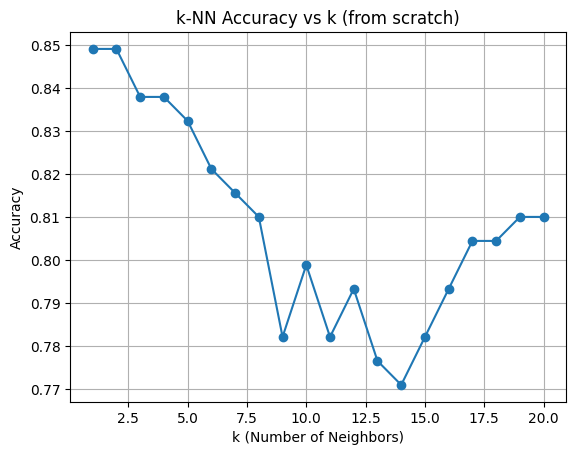


✅ Program complete: Titanic classification using k-NN from scratch.


In [ ]:
import csv
import random
import math
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Dataset path (DO NOT CHANGE)
dataset_path = '/content/DMDW_titanic_data.csv'

# Step 1: Load Titanic Dataset with categorical handling
def load_dataset(filename):
    dataset = []
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header

        for row in csv_reader:
            if not row:
                continue

            features = []
            for i, val in enumerate(row[1:-1]):
                # Assume column index 1 is Gender (male/female)
                if i == 1:
                    if val.lower() == 'male':
                        features.append(0.0)
                    elif val.lower() == 'female':
                        features.append(1.0)
                    else:
                        features.append(0.0)  # Default for missing

                else:
                    try:
                        features.append(float(val))
                    except ValueError:
                        features.append(0.0)  # Handle missing or non-numeric

            label = row[-1]  # Example: '0' for not survived, '1' for survived
            dataset.append((features, label))

    return dataset

# Step 2: Split Dataset
def train_test_split(dataset, test_size=0.2):
    random.seed(42)
    random.shuffle(dataset)
    split_index = int(len(dataset) * (1 - test_size))
    return dataset[:split_index], dataset[split_index:]

# Step 3: Euclidean Distance
def euclidean_distance(point1, point2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(point1, point2)))

# Step 4: Predict Label
def predict(train_set, test_point, k):
    distances = []
    for train_features, train_label in train_set:
        distance = euclidean_distance(test_point, train_features)
        distances.append((distance, train_label))

    distances.sort(key=lambda x: x[0])
    k_neighbors = [label for _, label in distances[:k]]

    label_counts = {}
    for label in k_neighbors:
        label_counts[label] = label_counts.get(label, 0) + 1

    sorted_label_counts = sorted(label_counts.items(), key=lambda item: item[1], reverse=True)

    if len(sorted_label_counts) > 1 and sorted_label_counts[0][1] == sorted_label_counts[1][1]:
        return distances[0][1]
    else:
        return sorted_label_counts[0][0]

# Step 5: Accuracy Calculation
def calculate_accuracy(test_set, train_set, k):
    correct = 0
    for features, label in test_set:
        pred = predict(train_set, features, k)
        if pred == label:
            correct += 1
    return correct / len(test_set)

# Main Program Execution
if __name__ == "__main__":
    dataset = load_dataset(dataset_path)
    train_set, test_set = train_test_split(dataset, test_size=0.2)

    k_values = list(range(1, 21))
    accuracies = []

    for k in k_values:
        acc = calculate_accuracy(test_set, train_set, k)
        print(f"k={k}, Accuracy={acc:.4f}")
        accuracies.append(acc)

    plt.plot(k_values, accuracies, marker='o')
    plt.title('k-NN Accuracy vs k (from scratch)')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

    print("\n✅ Program complete: Titanic classification using k-NN from scratch.")


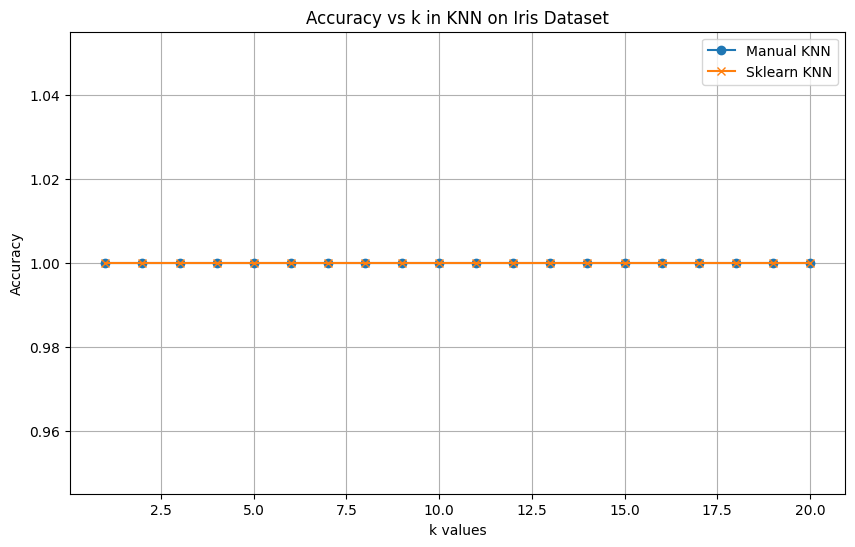

In [ ]:
#Load the iris dataset and perform knn plot the accuracy error w.r.t k values compare the accuracy with the builtin function of knn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

# 1. Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Implement KNN manually
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict(X_train, y_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], x_test)
        distances.append((dist, y_train[i]))
    distances = sorted(distances)[:k]
    neighbors = [label for _, label in distances]
    most_common = Counter(neighbors).most_common(1)
    return most_common[0][0]

# Evaluate for different values of k
k_values = range(1, 21)
manual_accuracies = []

for k in k_values:
    correct = 0
    for i in range(len(X_test)):
        pred = knn_predict(X_train, y_train, X_test[i], k)
        if pred == y_test[i]:
            correct += 1
    accuracy = correct / len(X_test)
    manual_accuracies.append(accuracy)

# 3. Compare with sklearn's built-in KNN
sklearn_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    sklearn_accuracies.append(accuracy)

# 4. Plot the results
plt.figure(figsize=(10,6))
plt.plot(k_values, manual_accuracies, label="Manual KNN", marker='o')
plt.plot(k_values, sklearn_accuracies, label="Sklearn KNN", marker='x')
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k in KNN on Iris Dataset")
plt.legend()
plt.grid(True)
plt.show()